In [1]:
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
%%capture

from ding0.core import NetworkDing0
from ding0.tools.logger import setup_logger
from ding0.tools.results import save_nd_to_pickle
from ding0.tools.plots import plot_mv_topology
from egoio.tools import db
from sqlalchemy.orm import sessionmaker
import oedialect

from ding0.tools import results # to load pickl file


# create new network
nd = NetworkDing0(name='network')


# set ID of MV grid district
mv_grid_districts = [40] # fn 40, 912

#### SET DING0 SETTINGS

In [3]:
# TODO set in config file
ding0_default=True
retain_all=False #  weil sonst graphen außerhalb des polys unverbunden zum graphen beibehalten werden

In [4]:
engine = db.connection(section='oedb_dialect', readonly=True)
session = sessionmaker(bind=engine)()

In [5]:
%%time

# STEP 1
nd.import_mv_grid_districts(session, mv_grid_districts_no=mv_grid_districts, ding0_default=ding0_default, need_parameterization=True)

=====> MV Grid Districts imported


Wall time: 6.05 s


In [6]:
# STEP 2
nd.import_generators(session, debug=False)

Generator Generator_mvgd_40_lvgd_420271_hydro_232524 has no la_id and was assigned to a random LV Grid District (lv_grid_district_420271).
Generator Generator_mvgd_40_lvgd_4116_hydro_232525 has no la_id and was assigned to a random LV Grid District (lv_grid_district_4116).
Generator Generator_mvgd_40_lvgd_4106_hydro_232528 has no la_id and was assigned to a random LV Grid District (lv_grid_district_4106).
Generator Generator_mvgd_40_lvgd_418188_hydro_232529 has no la_id and was assigned to a random LV Grid District (lv_grid_district_418188).
Generator Generator_mvgd_40_lvgd_420151_hydro_232831 has no la_id and was assigned to a random LV Grid District (lv_grid_district_420151).


In [7]:
%%time

# STEP 3
nd.mv_parametrize_grid(debug=False)

Wall time: 19 ms


In [8]:
# STEP 4: Validate MV Grid Districts
msg = nd.validate_grid_districts()
msg

[]

In [9]:
nd.build_lv_grids()

In [10]:
nd.mv_routing(debug=False)
nd.connect_generators(debug=False)


Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero

C:\Users\johnr\anaconda3\envs\ding0_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\johnr\anaconda3\envs\ding0_env\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\Users\johnr\anaconda3\envs\ding0_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initial

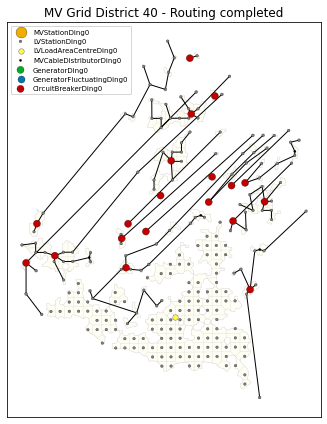

In [11]:
grid = nd._mv_grid_districts[0].mv_grid
plot_mv_topology(grid, subtitle='Routing completed')
# , filename='C:Users\johnr\1_routing_completed.png'

In [11]:
nd.mv_routing(debug=False)
nd.connect_generators(debug=False)


Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero

In [67]:
nd._mv_grid_districts[0]._lv_load_areas[0]._lv_grid_districts[0].lv_grid._graph.edges[list(nd._mv_grid_districts[0]._lv_load_areas[0]._lv_grid_districts[0].lv_grid._graph.edges)[0]].get('branch').__dict__

{'id_db': 'branch_HH1_1',
 'ring': None,
 'grid': lv_grid_420382,
 'length': 135,
 'kind': 'cable',
 'type': U_n         400.000
 I_max_th    275.000
 R_per_km      0.206
 L_per_km      0.256
 Name: NAYY 4x1x150, dtype: float64,
 'connects_aggregated': False,
 'circuit_breaker': None,
 'geometry': None,
 'critical': False}

In [15]:
nd._mv_grid_districts[0]._lv_load_areas[1]

lv_load_area_2292

In [16]:
nd._mv_grid_districts[0]._lv_load_areas[1]._lv_grid_districts[0]

lv_grid_district_419907

In [63]:
list(nd._mv_grid_districts[0]._lv_load_areas[0]._lv_grid_districts[0].lv_grid._graph.edges)[0]

(LVStation_mvgd_40_lvgd_420382, LVCableDist_mvgd_40_lvgd_420382_1)

In [20]:
nd._mv_grid_districts[0]._lv_load_areas[1]._lv_grid_districts[0].lv_grid._generators

[Generator_mvgd_40_lvgd_419907_solar_ground_mounted_235013,
 Generator_mvgd_40_lvgd_419907_solar_roof_mounted_235137]

In [21]:
nd._mv_grid_districts[0]._lv_load_areas[1]._lv_grid_districts[0].lv_grid._station

LVStation_mvgd_40_lvgd_419907

In [11]:
nd.mv_routing(debug=False)

Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m
Geo distance is zero, check objects' positions. Distance is set to 1m


In [12]:
nd.connect_generators(debug=False)

No valid conn. target found for Generator_mvgd_40_lvgd_419907_solar_ground_mounted_235013.Connected to LVStation_mvgd_40_lvgd_419907.
No valid conn. target found for Generator_mvgd_40_lvgd_2873_solar_ground_mounted_232624.Connected to LVStation_mvgd_40_lvgd_2873.
No valid conn. target found for Generator_mvgd_40_lvgd_419464_solar_ground_mounted_232678.Connected to LVStation_mvgd_40_lvgd_419464.
No valid conn. target found for Generator_mvgd_40_lvgd_3053_solar_roof_mounted_233000.Connected to LVStation_mvgd_40_lvgd_3053.
No valid conn. target found for Generator_mvgd_40_lvgd_3053_solar_roof_mounted_233097.Connected to LVStation_mvgd_40_lvgd_3053.
No valid conn. target found for Generator_mvgd_40_lvgd_420676_solar_roof_mounted_233083.Connected to LVStation_mvgd_40_lvgd_420676.
No valid conn. target found for Generator_mvgd_40_lvgd_3090_solar_ground_mounted_232747.Connected to LVStation_mvgd_40_lvgd_3090.
No valid conn. target found for Generator_mvgd_40_lvgd_3090_solar_roof_mounted_23281

In [27]:
nd._mv_grid_districts[0]._lv_load_areas[0]._lv_grid_districts[0].__dict__

{'id_db': 420382,
 'geo_data': <shapely.geometry.multipolygon.MultiPolygon at 0x2dd6650a700>,
 'lv_load_area': lv_load_area_2128,
 'lv_grid': lv_grid_420382,
 'population': 4,
 'peak_load_residential': 1.39742806193774,
 'peak_load_retail': 0.0,
 'peak_load_industrial': 0.0,
 'peak_load_agricultural': 0.0,
 'peak_load': 1.39742806193774,
 'sector_count_residential': 0,
 'sector_count_retail': 0,
 'sector_count_industrial': 0,
 'sector_count_agricultural': 0,
 'sector_consumption_residential': 6538.59284080918,
 'sector_consumption_retail': 0.0,
 'sector_consumption_industrial': 0.0,
 'sector_consumption_agricultural': 0.0,
 'mvlv_subst_id': None,
 'graph_district': None,
 'load_level': None,
 'buildings': None}

In [14]:
nd._mv_grid_districts[0]._lv_load_areas[0]._lv_grid_districts[0].lv_grid._cable_distributors[0]

LVCableDist_mvgd_40_lvgd_420382_1

In [13]:
nd._mv_grid_districts[0]._lv_load_areas[0]._lv_grid_districts[0].lv_grid._cable_distributors[0].__dict__

{'id_db': 1,
 'geo_data': None,
 'grid': lv_grid_420382,
 'string_id': 2,
 'branch_no': 1,
 'load_no': 1,
 'in_building': False,
 'geometry': None}

In [32]:
nd._mv_grid_districts[0]._lv_load_areas[70]._lv_grid_districts[0].__dict__

{'id_db': 5929,
 'geo_data': <shapely.geometry.multipolygon.MultiPolygon at 0x2dd6661c550>,
 'lv_load_area': lv_load_area_5529,
 'lv_grid': lv_grid_5929,
 'population': 63,
 'peak_load_residential': 22.0094919755194,
 'peak_load_retail': 0.0,
 'peak_load_industrial': 0.0,
 'peak_load_agricultural': 0.0,
 'peak_load': 22.0094919755194,
 'sector_count_residential': 0,
 'sector_count_retail': 0,
 'sector_count_industrial': 0,
 'sector_count_agricultural': 0,
 'sector_consumption_residential': 102982.837242745,
 'sector_consumption_retail': 0.0,
 'sector_consumption_industrial': 0.0,
 'sector_consumption_agricultural': 0.0,
 'mvlv_subst_id': None,
 'graph_district': None,
 'load_level': None,
 'buildings': None}

In [31]:
nd._mv_grid_districts[0]._lv_load_areas[70]._lv_grid_districts[0].lv_grid._generators[0].__dict__

{'id_db': 232543,
 'name': None,
 'geo_data': <shapely.geometry.point.Point at 0x2dd6662b850>,
 'mv_grid': mv_grid_40,
 'lv_load_area': lv_load_area_5529,
 'lv_grid': lv_grid_5929,
 'capacity': 3.0,
 'capacity_factor': 1,
 'type': 'solar',
 'subtype': 'solar_ground_mounted',
 'v_level': 7,
 '_weather_cell_id': 1127074}

In [30]:
nd._mv_grid_districts[0]._lv_load_areas[1]._lv_grid_districts[0].lv_grid._generators[0].__dict__

{'id_db': 235013,
 'name': None,
 'geo_data': <shapely.geometry.point.Point at 0x2dd66759400>,
 'mv_grid': mv_grid_40,
 'lv_load_area': lv_load_area_2292,
 'lv_grid': lv_grid_419907,
 'capacity': 1.0,
 'capacity_factor': 1,
 'type': 'solar',
 'subtype': 'solar_ground_mounted',
 'v_level': 7,
 '_weather_cell_id': 1127074}

In [29]:
nd._mv_grid_districts[0]._lv_load_areas[1]._lv_grid_districts[0].lv_grid._generators[1].__dict__

{'id_db': 235137,
 'name': None,
 'geo_data': <shapely.geometry.point.Point at 0x2dd66776ac0>,
 'mv_grid': mv_grid_40,
 'lv_load_area': lv_load_area_2292,
 'lv_grid': lv_grid_419907,
 'capacity': 138.0,
 'capacity_factor': 1,
 'type': 'solar',
 'subtype': 'solar_roof_mounted',
 'v_level': 6,
 '_weather_cell_id': 1127074}

In [ ]:

elements[0].network.static_data['LV_cables']

,U_n,I_max_th,R_per_km,L_per_km
name,,,,
NAYY 4x1x300,400,419,0.100,0.279
NAYY 4x1x240,400,364,0.125,0.254
NAYY 4x1x185,400,313,0.164,0.256
NAYY 4x1x150,400,275,0.206,0.256
NAYY 4x1x120,400,245,0.253,0.256
NAYY 4x1x95,400,215,0.320,0.261
NAYY 4x1x50,400,144,0.449,0.270
NAYY 4x1x35,400,123,0.868,0.271


In [43]:
elements[1].__dict__

{'id_db': 2128,
 'geo_data': <shapely.geometry.polygon.Polygon at 0x2c403346ee0>,
 'lv_load_area': lv_load_area_2128,
 'lv_grid': lv_grid_2128,
 'population': None,
 'peak_load_residential': None,
 'peak_load_retail': None,
 'peak_load_industrial': None,
 'peak_load_agricultural': None,
 'peak_load': 3.440542100000001,
 'sector_count_residential': None,
 'sector_count_retail': None,
 'sector_count_industrial': None,
 'sector_count_agricultural': None,
 'sector_consumption_residential': None,
 'sector_consumption_retail': None,
 'sector_consumption_industrial': None,
 'sector_consumption_agricultural': None,
 'mvlv_subst_id': 0,
 'graph_district': <networkx.classes.multidigraph.MultiDiGraph at 0x2c403346be0>,
 'load_level': 'lv',
 'buildings':               category      area  \
 osm_id                             
 121254826  residential  1063.060   
 285821993  residential   650.438   
 971421893       chapel   236.021   
 
                                                     geometry

In [17]:
elements[0]._graph

In [25]:
elements[1].graph_district

In [40]:
for n in elements[0]._graph.nodes:
    print(n)
    break

LVStation_mvgd_40_lvgd_2128


In [41]:
n.__dict__

{'id_db': 2128,
 'geo_data': <shapely.geometry.point.Point at 0x2c403375640>,
 'grid': lv_grid_2128,
 '_transformers': [Transformer_lv_grid_2128_1],
 'v_level_operation': None,
 'lv_load_area': lv_load_area_2128,
 'osm_id_node': 29585231}

In [11]:
e.grid_district.lv_grid._station.__dict__

{'id_db': 2128,
 'geo_data': <shapely.geometry.point.Point at 0x21274db6190>,
 'grid': lv_grid_2128,
 '_transformers': [Transformer_lv_grid_2128_1],
 'v_level_operation': None,
 'lv_load_area': lv_load_area_2128,
 'osm_id_node': 29585231}

In [12]:
e.grid_district.lv_grid.__dict__

{'network': network,
 'id_db': 2128,
 'grid_district': lv_grid_district_2128,
 '_cable_distributors': [],
 '_loads': [],
 '_generators': [Generator_mvgd_40_lvgd_2128_solar_roof_mounted_232788,
  Generator_mvgd_40_lvgd_2128_solar_roof_mounted_233043,
  Generator_mvgd_40_lvgd_2128_solar_roof_mounted_233071,
  Generator_mvgd_40_lvgd_2128_solar_roof_mounted_233084,
  Generator_mvgd_40_lvgd_2128_solar_roof_mounted_233176,
  Generator_mvgd_40_lvgd_2128_solar_roof_mounted_233184,
  Generator_mvgd_40_lvgd_2128_solar_roof_mounted_235165,
  Generator_mvgd_40_lvgd_2128_solar_roof_mounted_1602830],
 'v_level': 400,
 '_graph': <networkx.classes.graph.Graph at 0x21274db6160>,
 'default_branch_kind': 'cable',
 '_station': LVStation_mvgd_40_lvgd_2128,
 'population': None}

In [19]:
e.grid_district.lv_grid._station.__dict__

{'id_db': 2128,
 'geo_data': <shapely.geometry.point.Point at 0x21274db6190>,
 'grid': lv_grid_2128,
 '_transformers': [Transformer_lv_grid_2128_1],
 'v_level_operation': None,
 'lv_load_area': lv_load_area_2128,
 'osm_id_node': 29585231}

In [13]:
e.grid_district.lv_grid._station._transformers[0].__dict__

{'id_db': 1,
 'grid': lv_grid_2128,
 'v_level': 0.4,
 's_max_a': 100.0,
 's_max_b': None,
 's_max_c': None,
 'phase_angle': None,
 'tap_ratio': None,
 'r_pu': 0.0175,
 'x_pu': 0.035968736424845396}

In [18]:
e.grid_district.lv_grid._station._transformers[0].__dict__

{'id_db': 1,
 'grid': lv_grid_2128,
 'v_level': 0.4,
 's_max_a': 250.0,
 's_max_b': None,
 's_max_c': None,
 'phase_angle': None,
 'tap_ratio': None,
 'r_pu': 0.013,
 'x_pu': 0.037828560638755476}

In [22]:
e.grid_district.buildings

,category,area,geometry,raccordement_building,name,number_households,n_amenities_inside,x,y,capacity,nn,nn_dist,nn_coords,cluster
osm_id,,,,,,,,,,,,,,
121254826,residential,1063.060,"POLYGON ((4284384.933772514 2725229.425153703,...",POINT (4284397.64322427 2725231.60730715),Don-Bosco-Haus (Tagungshaus),1.0,1,4.284398e+06,2.725232e+06,1.708470,29585231,46.640970,POINT (4284444.248370417 2725229.779617371),0.0
285821993,residential,650.438,"POLYGON ((4284435.943428256 2725276.335724954,...",POINT (4284448.99985888 2725267.609138271),None,1.0,1,4.284449e+06,2.725268e+06,1.708470,2923114678,26.262987,POINT (4284472.956745268 2725256.847536233),0.0
971421893,chapel,236.021,"POLYGON ((4284406.968089831 2725240.447235622,...",POINT (4284414.241857724 2725234.829397242),None,1.0,1,4.284414e+06,2.725235e+06,0.023602,29585231,30.428458,POINT (4284444.248370417 2725229.779617371),0.0


In [17]:
e.grid_district.buildings.capacity.sum()

3.440542100000001